In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import intake,yaml
import intake_esm
from scipy import special
import keras
from keras.models import Model
from keras.layers import Dense, Input

In [3]:
def latest_version(cat):
    """
    input
    cat: esmdatastore
    output
    esmdatastore with latest DRS versions
    """
    latest_cat = cat.df.sort_values(by=['version','path']).drop_duplicates(['temporal_subset','source_id','table_id',
                                               'institution_id','variable_id','member_id',
                                               'grid_label','experiment_id'],keep='last')
    return latest_cat

In [4]:
#col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
col_url = "https://raw.githubusercontent.com/aradhakrishnanGFDL/gfdl-aws-analysis/master/esm-collection-spec-examples/esgf-world.json"
col = intake.open_esm_datastore(col_url)
esmcol_data = col.esmcol_data

In [5]:
model_name = 'CESM2'

In [6]:
#mlotst, tos,uo,vo

In [7]:
#tos_ sea surface temperature
#area cello
#ofx ocean fixed
#omon  ocean monthly average 

In [8]:

query_Omon_tos = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 table_id=['Omon'],
                 member_id=["r1i1p1f1","r1i1p1f2"],
                 source_id=model_name,
                 grid_label=['gn'],
                 variable_id=["tos"])
query_Ofx = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 table_id=['Ofx'],
               member_id=["r1i1p1f1","r1i1p1f2"],
                 source_id=model_name,
                 grid_label=['gn'],
                 variable_id=["areacello"])

In [9]:
cat_Omon_tos = col.search(**query_Omon_tos)
cat_Omon_tos_lat = latest_version(cat_Omon_tos)

cat_Omon_tos_latest = intake.open_esm_datastore(cat_Omon_tos_lat,esmcol_data=esmcol_data)

In [10]:
cat_Omon_tos.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
0,CMIP6,NCAR,CESM2,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,000101-005012,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
1,CMIP6,NCAR,CESM2,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,005101-010012,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
2,CMIP6,NCAR,CESM2,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,010101-015012,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
3,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,000101-015012,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
4,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,000101-015012,v20190828,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
5,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,000101-015012,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
6,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,015101-019912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
7,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,020001-024912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
8,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,025001-029912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
9,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,030001-034912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...


In [11]:
cat_Ofx = col.search(**query_Ofx)
cat_Ofx_lat = latest_version(cat_Ofx)

cat_Ofx_latest = intake.open_esm_datastore(cat_Ofx_lat,esmcol_data=esmcol_data)

In [12]:
cat_Ofx_latest.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
3,CMIP6,NCAR,CESM2,historical,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20190308,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/historic...
0,CMIP6,NCAR,CESM2,1pctCO2,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
2,CMIP6,NCAR,CESM2,abrupt-4xCO2,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...


In [13]:
dict_Omon_tos = cat_Omon_tos_latest.to_dataset_dict(storage_options=dict(anon=True), cdf_kwargs={'decode_times': True,'chunks': {'time': 1}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [14]:
dict_Ofx = cat_Ofx_latest.to_dataset_dict(storage_options=dict(anon=True),cdf_kwargs={'decode_times': True,'chunks': {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [15]:
dict_Omon_tos.keys()

dict_keys(['CMIP6.NCAR.CESM2.historical.Omon', 'CMIP6.NCAR.CESM2.1pctCO2.Omon', 'CMIP6.NCAR.CESM2.abrupt-4xCO2.Omon'])

In [16]:
dict_Ofx.keys()

dict_keys(['CMIP6.NCAR.CESM2.1pctCO2.Ofx', 'CMIP6.NCAR.CESM2.historical.Ofx', 'CMIP6.NCAR.CESM2.abrupt-4xCO2.Ofx'])

In [17]:
ds_Ofx = dict_Ofx["CMIP6.NCAR.CESM2.historical.Ofx"] #xarray dataset object to access Ofx areacello dataset used to calculate the weighted average

In [18]:
def distance_on_unit_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = np.pi / 180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    # theta = longitude
    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians
    # Compute spherical distance from spherical coordinates.
    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta, phi)
    # cosine( arc length ) =
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
    cos = np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) + np.cos(phi1) * np.cos(
        phi2
    )
    arc = np.arccos(cos)
    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc

In [19]:
def find_closest_grid_point(lon, lat, gridlon, gridlat):
    """find integer indices of closest grid point in grid of coordinates
    gridlon, gridlat for a given geographical lon/lat.
    PARAMETERS:
    -----------
        lon (float): longitude of point to find
        lat (float): latitude of point to find
        gridlon (numpy.ndarray): grid longitudes
        gridlat (numpy.ndarray): grid latitudes
    RETURNS:
    --------
    iclose, jclose: integer
        grid indices for geographical point of interest
    """

    if isinstance(gridlon, xr.core.dataarray.DataArray):
        gridlon = gridlon.values
    if isinstance(gridlat, xr.core.dataarray.DataArray):
        gridlat = gridlat.values
    dist = distance_on_unit_sphere(lat, lon, gridlat, gridlon)
    jclose, iclose = np.unravel_index(dist.argmin(), gridlon.shape)
    return iclose, jclose


In [20]:
i,j= find_closest_grid_point(-157, -5, ds_Ofx.lon, ds_Ofx.lat)#for southwest
i,j

(215, 168)

In [21]:
k,l = find_closest_grid_point(-90, 5, ds_Ofx.lon, ds_Ofx.lat)#for northwest
k,l

(275, 205)

CALCULATING the summation of areacello

In [ ]:
def compute_area_regular_grid(ds, Rearth=6378e3):
    """ compute the cells area on a regular grid """

    rfac = 2 * np.pi * Rearth / 360

    dx1d = rfac * 1 
    dy1d = rfac * 1

    dx2d, dy2d = np.meshgrid(dx1d, dy1d)
    _, lat2d = np.meshgrid(ds["nlon"].values, ds["nlat"].values)

    dx = dx2d * np.cos(2 * np.pi * lat2d / 360)
    dy = dy2d
    area = dx * dy
    return xr.DataArray(area, dims=('nlat', 'nlon'))

In [ ]:
ds_Ofx = compute_area_regular_grid(ds_Ofx)

In [74]:
ds_Ofx.dims

('nlat', 'nlon')

In [76]:
ds_Ofx.nlon

<xarray.DataArray 'nlon' (nlon: 320)>
array([  0,   1,   2, ..., 317, 318, 319])
Dimensions without coordinates: nlon

In [22]:
#TODO INSERT CELL SELECT region of interest in areacello
areacello_nino3 = ds_Ofx.areacello.sel(nlat = slice(j,l), nlon = slice(i,k))

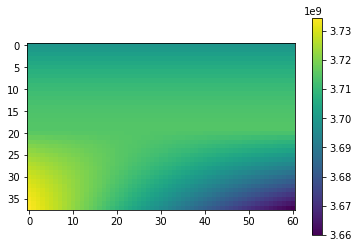

In [23]:
plt.imshow(areacello_nino3[0])
plt.colorbar()

In [24]:
#TODO 
#CALCULATE total_areacello, summation across lat,lon (in our dataset y,x respectively)

total_areacello = areacello_nino3.sum(dim=('nlon', "nlat"))


NINO3 INDEX CALCULATION 

REGION 

(5S-5N , 150W-90W) 

SELECT tos and areacello for the region of interest

## Historical

In [25]:
ds_hist = dict_Omon_tos["CMIP6.NCAR.CESM2.historical.Omon"]


In [28]:
ds_hist.dims

Frozen(SortedKeysDict({'member_id': 1, 'time': 1980, 'nlat': 384, 'nlon': 320, 'd2': 2, 'vertices': 4}))

In [40]:
#ds_hist = ds_hist.assign_coords( lon=(((ds_hist.nlon + 180) % 360) - 180))

In [29]:
tos_his = ds_hist.tos.sel(time = slice("1980", "2011"))

In [42]:
tos_his = ds_hist.tos.sel(nlat = slice(j,l), nlon = slice(i,k))
tos_his

<xarray.DataArray 'tos' (member_id: 1, time: 1980, nlat: 38, nlon: 61)>
dask.array<getitem, shape=(1, 1980, 38, 61), dtype=float32, chunksize=(1, 1, 38, 61), chunktype=numpy.ndarray>
Coordinates:
    lat        (nlat, nlon) float64 dask.array<chunksize=(38, 61), meta=np.ndarray>
    lon        (nlat, nlon) float64 dask.array<chunksize=(38, 61), meta=np.ndarray>
  * nlat       (nlat) int32 168 169 170 171 172 173 ... 200 201 202 203 204 205
  * nlon       (nlon) int32 215 216 217 218 219 220 ... 270 271 272 273 274 275
  * time       (time) object 1850-01-15 13:00:00.000007 ... 2014-12-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        This may differ from "surface temperature" in regions of ...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

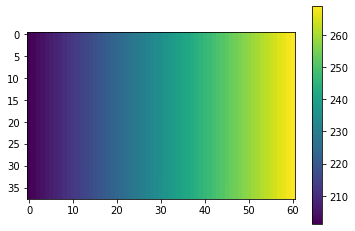

In [43]:
plt.imshow(tos_his.lon)
plt.colorbar()

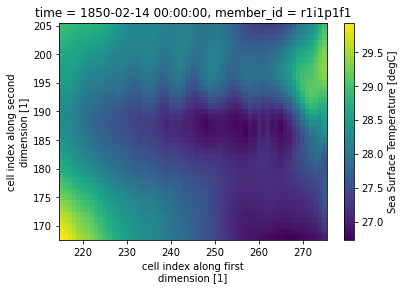

In [45]:
tos_his.isel(time=1).plot()#CESM2
#30-90 degree

In [87]:
#tos_his.sel(nlon = [30, 120], nlat = [-5, 5], method="nearest")

In [88]:

#plt.imshow(tos_his.nlat)
#plt.colorbar()
#print(tos_his.lat)

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [46]:
tos_mean_nino3_his = (tos_his * areacello_nino3).sum(dim=('nlon', 'nlat')) / total_areacello
#nino3_index.plot()

In [47]:
tos_mean_nino3_his = tos_mean_nino3_his.compute()


In [48]:
tos_mean_nino3_his.size #1980 values, 1 value per month , 12 per year for 165 years

1980

In [49]:
tos_mean_nino3_his.isel(time=0).compute()

<xarray.DataArray (member_id: 1)>
array([27.218649], dtype=float32)
Coordinates:
    time       object 1850-01-15 13:00:00.000007
  * member_id  (member_id) <U8 'r1i1p1f1'

In [50]:
datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()
tos_mean_nino3_his['time'] = datetimeindex


<ipython-input-50-e7b25880c2d7>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()


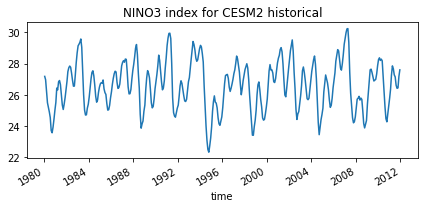

In [53]:
tos_mean_nino3_his.sel(time = slice("1980", "2011")).plot(aspect=2, size=3)
plt.title("NINO3 index for CESM2 historical")
plt.tight_layout()
plt.draw()

ADDITIONAL EXPLORATION

CLIMATOLOGY (average all Jans, Febs, etc) CALC EXAMPLES (YEARS NEED A TWEAK, calculate for 20 year chunks or as needed)

In [54]:
tos_nino3_climatology = tos_his.sel(time=slice('1980','2011')).groupby('time.month').mean(dim='time')


In [55]:
tos_nino3_climatology.compute()

<xarray.DataArray 'tos' (member_id: 1, month: 12, nlat: 38, nlon: 61)>
array([[[[29.209965, 29.130562, 29.052784, ..., 25.905388, 25.872889,
          25.849794],
         [29.091526, 29.0112  , 28.932077, ..., 25.935932, 25.905674,
          25.886341],
         [28.973148, 28.891562, 28.810413, ..., 25.95762 , 25.930843,
          25.916332],
         ...,
         [28.160675, 28.104883, 28.048103, ..., 28.024567, 28.103611,
          28.197071],
         [28.269974, 28.21824 , 28.163525, ..., 27.983881, 28.063585,
          28.160637],
         [28.375744, 28.329056, 28.276684, ..., 27.92146 , 28.006207,
          28.109074]],

        [[29.412592, 29.353365, 29.289112, ..., 26.956669, 27.00181 ,
          27.068718],
         [29.26866 , 29.208092, 29.143744, ..., 27.024826, 27.075455,
          27.150597],
         [29.123035, 29.061304, 28.99707 , ..., 27.089245, 27.145538,
          27.229889],
...
         [28.553999, 28.473679, 28.40727 , ..., 27.430302, 27.459688,
          27.484158],
         [28.739685, 28.66461 , 28.598276, ..., 27.574516, 27.600739,
          27.619848],
         [28.925016, 28.856369, 28.792723, ..., 27.714012, 27.738127,
          27.753496]],

        [[29.085342, 28.991125, 28.896746, ..., 24.962626, 24.924046,
          24.87983 ],
         [28.982029, 28.885649, 28.789696, ..., 24.981323, 24.945786,
          24.90263 ],
         [28.881021, 28.781734, 28.684227, ..., 24.990803, 24.958145,
          24.916807],
         ...,
         [28.429935, 28.364061, 28.291166, ..., 27.97245 , 28.008457,
          28.062819],
         [28.566433, 28.503193, 28.434095, ..., 28.082996, 28.110271,
          28.15303 ],
         [28.707664, 28.648575, 28.583181, ..., 28.174694, 28.196144,
          28.230244]]]], dtype=float32)
Coordinates:
    lat        (nlat, nlon) float64 -5.209 -5.209 -5.209 ... 4.65 4.649 4.648
    lon        (nlat, nlon) float64 201.3 202.4 203.6 ... 266.6 267.7 268.8
  * nlat       (nlat) int32 168 169 170 171 172 173 ... 200 201 202 203 204 205
  * nlon       (nlon) int32 215 216 217 218 219 220 ... 270 271 272 273 274 275
  * member_id  (member_id) <U8 'r1i1p1f1'
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

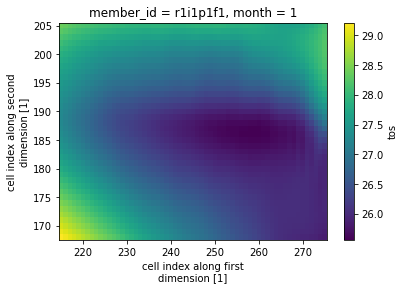

In [56]:
tos_nino3_climatology.isel(month=0).plot()

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [58]:
tos_sel = tos_his.sel(time=slice('1980','2011'))
index_nino3 = (tos_sel.groupby('time.month')-tos_nino3_climatology).mean(dim=['nlon','nlat'])

In [59]:
index_nino3.compute()

<xarray.DataArray 'tos' (member_id: 1, time: 384)>
array([[ 3.73895586e-01, -3.25954437e-01, -1.40727389e+00,
        -2.43197227e+00, -2.43628192e+00, -2.14633894e+00,
        -1.80969286e+00, -1.90428698e+00, -1.71221828e+00,
        -1.50189078e+00, -1.44818652e+00, -1.35371661e+00,
        -1.29444575e+00, -8.63037407e-01, -1.35612833e+00,
        -1.08940625e+00, -7.25693524e-01, -4.02046323e-01,
        -3.71443480e-01, -2.69126385e-01, -2.19488427e-01,
        -3.08085773e-02, -7.10848793e-02, -2.84608044e-02,
         4.69295681e-02,  1.90520629e-01,  5.45907058e-02,
        -7.88582638e-02,  1.25708416e-01,  3.40682298e-01,
         5.82762718e-01,  9.40220952e-01,  1.27891850e+00,
         1.82565093e+00,  2.17287278e+00,  2.32135892e+00,
         2.33260536e+00,  1.94759762e+00,  1.69154716e+00,
         1.65550733e+00,  1.40361881e+00,  4.16925311e-01,
        -3.34973574e-01, -5.78597367e-01, -5.75026929e-01,
        -7.16144621e-01, -7.43593931e-01, -9.69491184e-01,
        -9.42024529e-01, -8.81101012e-01, -6.44603074e-01,
        -4.84907240e-01, -1.02199748e-01,  1.61703885e-01,
         2.63229042e-01,  2.86988348e-01,  2.45791361e-01,
         2.29218587e-01,  2.65636861e-01,  1.23757340e-01,
...
         2.83726859e+00,  2.69006681e+00,  2.55296731e+00,
         2.32189059e+00,  1.70554912e+00,  3.80925953e-01,
        -2.61179715e-01, -2.96640933e-01, -7.53017485e-01,
        -1.22939682e+00, -1.60753596e+00, -1.77148271e+00,
        -1.62588346e+00, -1.57317972e+00, -1.88736141e+00,
        -2.02013421e+00, -1.97870898e+00, -1.25843370e+00,
        -6.49028957e-01, -6.22620046e-01, -1.11487651e+00,
        -1.55656123e+00, -1.76970267e+00, -2.01369143e+00,
        -1.40232015e+00, -1.17839515e+00, -7.83269584e-01,
        -3.19665551e-01,  2.47325026e-03,  3.78563493e-01,
         8.10829759e-01,  1.27259803e+00,  1.66209888e+00,
         1.55667186e+00,  1.44971085e+00,  1.49795485e+00,
         1.45860410e+00,  1.07673061e+00,  5.30247867e-01,
         3.65016013e-01,  5.36743462e-01,  1.11186303e-01,
        -1.38194174e-01, -3.95390689e-01, -8.10724318e-01,
        -1.16642928e+00, -1.11795008e+00, -1.04847002e+00,
        -1.00361824e+00, -9.29316461e-01, -4.07144368e-01,
        -6.77438900e-02,  3.45070995e-02,  2.27516711e-01,
         7.95303702e-01,  9.98688102e-01,  1.13616765e+00,
         1.00639939e+00,  1.28779101e+00,  1.23280084e+00]], dtype=float32)
Coordinates:
  * time       (time) object 1980-01-15 12:00:00 ... 2011-12-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

<ipython-input-60-90fd70a17ab6>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = index_nino3.indexes['time'].to_datetimeindex()


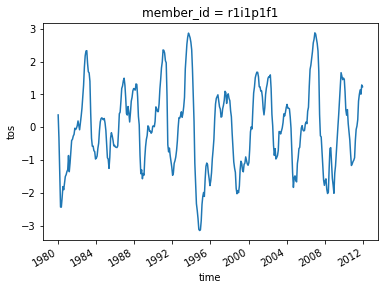

In [60]:
datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
index_nino3['time'] = datetimeindex
index_nino3.plot()

## 1%CO2

In [63]:
ds_1pct = dict_Omon_tos["CMIP6.NOAA-GFDL.CESM2.1pctCO2.Omon"]

KeyError: 'CMIP6.NOAA-GFDL.CESM2.1pctCO2.Omon'

In [62]:
ds_1pct.time.to_dataframe()

NameError: name 'ds_1pct' is not defined

In [ ]:
#ds_1pct.info


In [20]:
#tos_1pct = ds_1pct.tos#.sel(time = slice("1980", "2011"))

In [34]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 

tos_1pct = ds_1pct.tos.sel(y = slice(-5,5), x = slice(-150,-90))
#tos

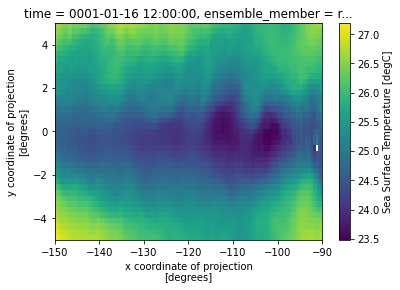

In [35]:
tos_1pct.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [36]:
tos_mean_nino3_1pct = (tos_1pct * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [37]:
tos_mean_nino3_1pct.compute()

<xarray.DataArray (ensemble_member: 1, time: 1800)>
array([[25.240553, 25.748297, 26.135637, ..., 27.92831 , 28.12126 ,
        28.985657]], dtype=float32)
Coordinates:
  * time             (time) object 0001-01-16 12:00:00 ... 0150-12-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [38]:
tos_mean_nino3_1pct.size

1800

In [39]:
tos_mean_nino3_1pct.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([25.240553], dtype=float32)
Coordinates:
    time             object 0001-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [40]:
#datetimeindex_1pct = tos_mean_nino3_1pct.indexes['time'].to_datetimeindex()

In [41]:
#tos_mean_nino3_1pct['time'] = datetimeindex_1pct

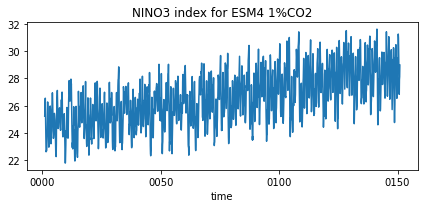

In [42]:
tos_mean_nino3_1pct.plot(aspect=2, size=3)
plt.title("NINO3 index for ESM4 1%CO2")
plt.tight_layout()
plt.draw()

In [43]:
tos_nino3_climatology_1pct = tos_1pct.sel(time=slice('0119','0150')).groupby('time.month').mean(dim='time')


In [44]:
tos_nino3_climatology_1pct.compute()

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'tos' (ensemble_member: 1, month: 12, y: 39, x: 120)>
array([[[[30.213112, 30.188995, 30.1706  , ..., 29.830112, 29.852398,
          29.880331],
         [30.17844 , 30.152851, 30.136745, ..., 29.842587, 29.863445,
          29.887173],
         [30.136904, 30.104893, 30.091488, ..., 29.851913, 29.86638 ,
          29.886084],
         ...,
         [29.589394, 29.584965, 29.576187, ..., 29.719463, 29.811716,
          29.888096],
         [29.638636, 29.631884, 29.618332, ..., 29.712002, 29.81858 ,
          29.911   ],
         [29.680494, 29.672598, 29.662003, ..., 29.687664, 29.81202 ,
          29.919664]],

        [[30.676498, 30.66817 , 30.655128, ..., 30.525711, 30.507595,
          30.491983],
         [30.614304, 30.60513 , 30.58675 , ..., 30.50057 , 30.467339,
          30.447266],
         [30.538797, 30.530914, 30.518574, ..., 30.438341, 30.40107 ,
          30.376741],
...
         [29.544744, 29.53453 , 29.50552 , ..., 30.165003, 30.139393,
          30.10944 ],
         [29.634571, 29.615286, 29.59287 , ..., 30.202045, 30.17641 ,
          30.1494  ],
         [29.734144, 29.716854, 29.695312, ..., 30.223364, 30.201542,
          30.186283]],

        [[29.6629  , 29.649364, 29.6409  , ..., 27.941244, 27.945028,
          27.946358],
         [29.628082, 29.61208 , 29.59947 , ..., 27.912395, 27.917028,
          27.923817],
         [29.5962  , 29.581236, 29.560741, ..., 27.876083, 27.887657,
          27.897982],
         ...,
         [29.644798, 29.61794 , 29.590204, ..., 29.97118 , 30.009048,
          30.051731],
         [29.711823, 29.680387, 29.655628, ..., 29.95771 , 30.007977,
          30.058826],
         [29.765667, 29.735834, 29.713638, ..., 29.922577, 29.986296,
          30.047022]]]], dtype=float32)
Coordinates:
    lat              (y, x) float32 -4.872 -4.872 -4.872 ... 4.872 4.872 4.872
    lon              (y, x) float32 -149.8 -149.2 -148.8 ... -90.75 -90.25
  * x                (x) float64 -149.8 -149.2 -148.8 ... -91.25 -90.75 -90.25
  * y                (y) float64 -4.872 -4.615 -4.359 ... 4.359 4.615 4.872
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

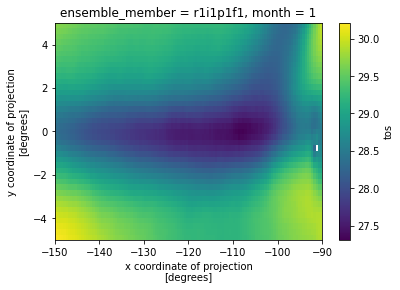

In [45]:
tos_nino3_climatology_1pct.isel(month=0).plot()

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [46]:
tos_sel = tos_1pct.sel(time=slice('0119','0150'))
index_nino3 = (tos_sel.groupby('time.month')-tos_nino3_climatology_1pct).mean(dim=['x','y'])

In [47]:
index_nino3.compute()

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'tos' (ensemble_member: 1, time: 384)>
array([[-2.4369519 , -2.2268212 , -1.0887513 , -1.6543334 , -1.5035197 ,
        -1.2875879 , -1.0684881 , -1.4005944 , -1.2731    , -1.3996809 ,
        -1.58933   , -1.5726931 , -1.2612725 , -0.6119959 , -0.51061875,
        -0.13067307, -0.29454368, -0.04160992, -0.17284419, -0.26489195,
         0.02869011,  0.4207879 ,  0.02471487, -0.04387553, -0.07532196,
        -0.19544934, -0.26992562, -0.8190028 , -0.30284485, -0.6764676 ,
        -0.6333329 , -0.01547616,  0.16490395, -0.28924665, -0.644857  ,
        -0.14059876, -0.39786774, -0.26563781, -0.53002644, -0.5272849 ,
         0.02802673,  0.98940456,  1.3593884 ,  0.9912849 ,  0.66672784,
         0.670518  ,  0.30287465, -0.25085023, -0.26936194, -0.45564312,
        -0.80144507, -0.38800552, -0.9126912 , -1.1749899 , -1.3568214 ,
        -1.1087555 , -1.4447093 , -0.64234054, -0.5694114 , -0.77251536,
        -0.32780448, -0.8955987 , -0.01791439,  0.02088269, -0.28242624,
        -0.93562704, -1.3307865 , -1.9477749 , -1.9943852 , -1.7336345 ,
        -2.2079718 , -1.6415415 , -0.68658674, -0.3762771 ,  0.16121095,
         0.091989  ,  0.7316947 ,  1.1050764 ,  0.9559299 ,  0.6947481 ,
         0.6008345 ,  0.18342237, -0.06635599, -0.5096147 , -0.6080536 ,
        -1.1362656 , -1.2539004 , -0.6717468 , -1.4990873 , -1.2803187 ,
        -0.61892086, -0.31274074, -0.18638737, -0.02652749,  0.4875758 ,
         0.6004967 ,  0.2831006 ,  0.27150095,  0.58753574,  0.36027732,
...
        -0.5345194 , -0.53313386, -0.11180329,  0.26588023,  0.3369079 ,
         0.82470024,  1.2793261 ,  1.2823577 ,  0.91595846,  0.5875596 ,
         0.38317513,  0.21429671, -0.31416753, -0.35331574, -0.46565187,
        -0.8663356 , -0.64976525, -0.03015177,  0.24542378,  0.1765754 ,
         0.32983452,  0.50830954,  0.43352586,  0.35982594,  0.9267963 ,
         1.157785  ,  0.6227679 ,  0.6827985 ,  0.75364524,  0.62893903,
         0.38742086,  0.3754449 ,  0.32459682,  0.33483157,  0.20203443,
         0.9881769 ,  0.9853196 ,  0.7987803 ,  0.51569223,  0.95085263,
         0.9769161 ,  0.82514256,  0.1648155 , -0.13554479,  0.08262371,
        -0.27564645,  0.07859372,  0.19080994, -0.4583548 , -0.316397  ,
         0.06270322, -0.03229918, -0.11438977, -0.47512197, -0.5908516 ,
        -0.17773159, -0.04202524,  0.08589452,  0.09709202,  0.50927603,
        -0.35982484, -0.00820339,  0.06509932, -0.5364282 , -0.7249427 ,
        -1.2470423 , -1.5404854 , -1.21077   , -1.1435374 , -0.4587622 ,
         0.7545023 ,  0.3829307 ,  0.41256016,  0.2119426 ,  0.28851348,
        -0.11456998, -0.08851116,  0.24047692,  0.23467404,  0.10117027,
         0.38907775,  0.3508126 ,  0.75314975,  0.10327009,  0.20809744,
         0.99135965,  0.91818434,  1.1799519 ,  1.1277878 ,  0.99605316,
         0.5242531 ,  1.2069478 ,  0.84775275,  0.85939485]],
      dtype=float32)
Coordinates:
  * time             (time) object 0119-01-16 12:00:00 ... 0150-12-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
    month            (time) int64 1 2 3 4 5 6 7 8 9 10 ... 4 5 6 7 8 9 10 11 12

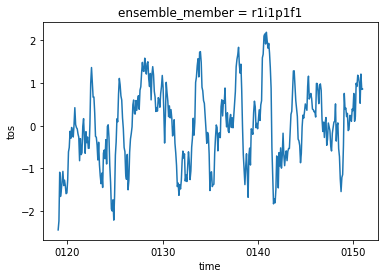

In [48]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3.plot()

## Abrupt-4xCO2

In [49]:
ds_4x = dict_Omon_tos["CMIP6.NOAA-GFDL.GFDL-ESM4.abrupt-4xCO2.Omon"]

In [50]:
ds_4x.time.to_dataframe()

,time
time,
0001-01-16 12:00:00,0001-01-16 12:00:00
0001-02-15 00:00:00,0001-02-15 00:00:00
0001-03-16 12:00:00,0001-03-16 12:00:00
0001-04-16 00:00:00,0001-04-16 00:00:00
0001-05-16 12:00:00,0001-05-16 12:00:00
...,...
0150-08-16 12:00:00,0150-08-16 12:00:00
0150-09-16 00:00:00,0150-09-16 00:00:00
0150-10-16 12:00:00,0150-10-16 12:00:00


In [51]:
tos_4x = ds_4x.tos.sel(time = slice("0119", "0150"))

In [52]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
tos_4x = ds_4x.tos.sel(y = slice(-5,5), x = slice(-150,-90))
#tos

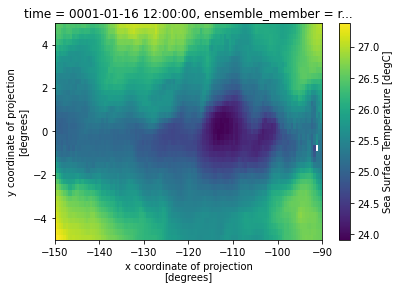

In [53]:
tos_4x.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [54]:
tos_mean_nino3_4x = (tos_4x * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [55]:
tos_mean_nino3_4x.compute()

<xarray.DataArray (ensemble_member: 1, time: 1800)>
array([[25.639414, 26.249512, 26.237864, ..., 26.837673, 27.146858,
        28.272776]], dtype=float32)
Coordinates:
  * time             (time) object 0001-01-16 12:00:00 ... 0150-12-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [56]:
tos_mean_nino3_4x.size #1980 values, 1 value per month , 12 per year for 165 years

1800

In [57]:
tos_mean_nino3_4x.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([25.639414], dtype=float32)
Coordinates:
    time             object 0001-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [ ]:
#datetimeindex_4x = tos_mean_nino3_4x.indexes['time'].to_datetimeindex()
#tos_mean_nino3_4x['time'] = datetimeindex_4x


In [ ]:
tos_mean_nino3_4x.sel(time=slice('0119','0150')).plot(aspect=2, size=3)
plt.title("NINO3 index for ESM4 abrupt-4xCO2")
plt.tight_layout()
plt.draw()

In [ ]:
tos_nino3_climatology_4x = tos_4x.sel(time=slice('0119','0150')).groupby('time.month').mean(dim='time')


In [ ]:
tos_nino3_climatology_4x.compute()

In [ ]:
tos_nino3_climatology_4x.isel(month=0).plot()

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [46]:
tos_sel_4x = tos_4x.sel(time=slice('0119','0150'))
index_nino3_4x = (tos_sel_4x.groupby('time.month')-tos_nino3_climatology_4x).mean(dim=['x','y'])

In [ ]:
index_nino3_4x.compute()

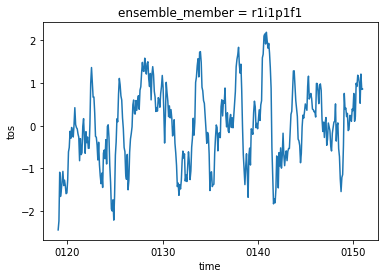

In [48]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3_4x.plot()